# Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./dataset/pima-indians-diabetes.csv',
                header=None)
df.columns = ['pregnant','plasma','pressure','thickness',
              'insulin','BMI','pedigree','age','class']
df

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
import seaborn as sns

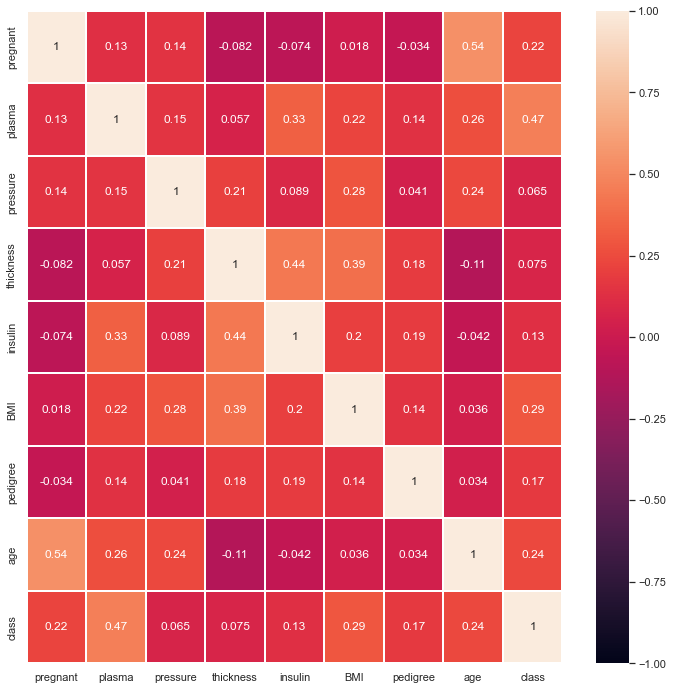

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),vmax=1,vmin=-1,annot=True,linewidths=0.1)
plt.show()

<Figure size 576x576 with 0 Axes>

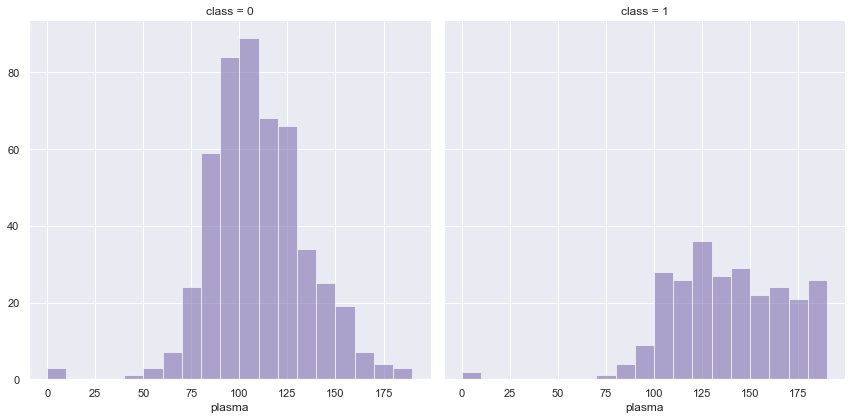

In [8]:
sns.set(color_codes = True)
plt.figure(figsize=(8,8))
grid = sns.FacetGrid(df, col='class',height=6)
grid.map(plt.hist, 'plasma', bins=range(0,200,10),color='m',alpha=0.6)
plt.show()

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
np.random.seed(3)
tf.random.set_seed(3)

In [11]:
df.head()

X = df.iloc[:, :8].to_numpy()
Y = df.iloc[:, -1].to_numpy()

print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
model = keras.Sequential()
model.add(keras.layers.Dense(12, input_dim=8, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics='accuracy')

In [19]:
model.fit(X,Y, epochs=20, batch_size=10)

Epoch 1/20
77/77 [==============================] - 0s 1ms/step - loss: 0.5544 - accuracy: 0.7122
Epoch 2/20
77/77 [==============================] - 0s 1ms/step - loss: 0.5516 - accuracy: 0.7227
Epoch 3/20
77/77 [==============================] - 0s 1ms/step - loss: 0.5458 - accuracy: 0.7240
Epoch 4/20
77/77 [==============================] - 0s 1ms/step - loss: 0.5489 - accuracy: 0.7279
Epoch 5/20
77/77 [==============================] - 0s 1ms/step - loss: 0.5451 - accuracy: 0.7161
Epoch 6/20
77/77 [==============================] - 0s 1ms/step - loss: 0.5477 - accuracy: 0.7279
Epoch 7/20
77/77 [==============================] - 0s 1ms/step - loss: 0.5520 - accuracy: 0.7161
Epoch 8/20
77/77 [==============================] - 0s 1ms/step - loss: 0.5554 - accuracy: 0.7201
Epoch 9/20
77/77 [==============================] - 0s 1ms/step - loss: 0.5463 - accuracy: 0.7174
Epoch 10/20
77/77 [==============================] - 0s 1ms/step - loss: 0.5455 - accuracy: 0.7266
Epoch 11/20
77/77 [

In [20]:
df = pd.read_csv('./dataset/iris.csv',
                names=['sepal_length','sepal_width','petal_length','petal_width','species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Figure size 864x864 with 0 Axes>

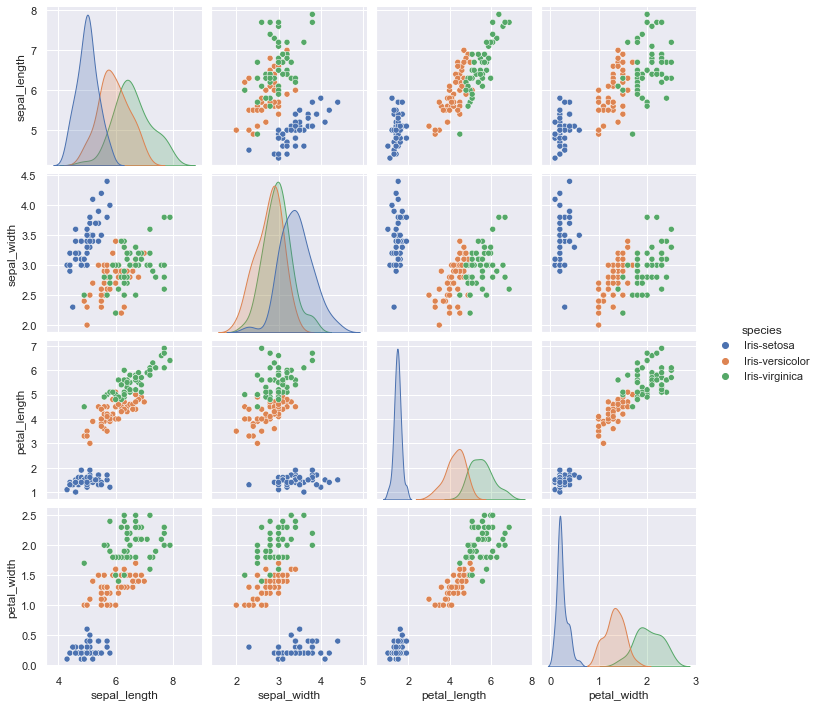

In [22]:
plt.figure(figsize=(12,12))
sns.pairplot(df, hue='species')
plt.show()

In [31]:
X = df.iloc[:, :4].to_numpy()
Y = df.iloc[:, -1].to_numpy()

print(X.dtype)
print(Y.dtype)

float64
object


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
e = LabelEncoder()
e.fit(Y)
Y = e.transform(Y)
print(Y)

Y_encoding = keras.utils.to_categorical(Y)
print(Y_encoding)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.

In [34]:
model = keras.Sequential()
model.add(keras.layers.Dense(16, input_dim=4, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                80        
                                                                 
 dense_4 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics='accuracy')

In [37]:
model.fit(X,Y_encoding, epochs=50, batch_size=30)

Epoch 1/50
5/5 [==============================] - 0s 3ms/step - loss: 1.6660 - accuracy: 0.3333
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 1.5540 - accuracy: 0.3333
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 1.4491 - accuracy: 0.3333
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 1.3621 - accuracy: 0.3333
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 1.2812 - accuracy: 0.3333
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 1.2155 - accuracy: 0.3333
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1603 - accuracy: 0.3333
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1082 - accuracy: 0.3333
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0644 - accuracy: 0.3333
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0293 - accuracy: 0.3333
Epoch 11/50
5/5 [======================

In [38]:
## Overfitting
df = pd.read_csv('./dataset/sonar.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [39]:
X = df.iloc[:, :-1].to_numpy()
Y = df.iloc[:, -1].to_numpy()

print(X.dtype)
print(Y.dtype)

float64
object


In [40]:
e = LabelEncoder()
e.fit(Y)
Y = e.transform(Y)
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [44]:
model = keras.Sequential()
model.add(keras.layers.Dense(24, input_dim=60, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [45]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [46]:
model.fit(X,Y, epochs=20, batch_size=5)

Epoch 1/20
42/42 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.5481
Epoch 2/20
42/42 [==============================] - 0s 1ms/step - loss: 0.6583 - accuracy: 0.6442
Epoch 3/20
42/42 [==============================] - 0s 1ms/step - loss: 0.6369 - accuracy: 0.6490
Epoch 4/20
42/42 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.7067
Epoch 5/20
42/42 [==============================] - 0s 1ms/step - loss: 0.5958 - accuracy: 0.7500
Epoch 6/20
42/42 [==============================] - 0s 1ms/step - loss: 0.5826 - accuracy: 0.7067
Epoch 7/20
42/42 [==============================] - 0s 1ms/step - loss: 0.5650 - accuracy: 0.7260
Epoch 8/20
42/42 [==============================] - 0s 1ms/step - loss: 0.5500 - accuracy: 0.7500
Epoch 9/20
42/42 [==============================] - 0s 1ms/step - loss: 0.5444 - accuracy: 0.7885
Epoch 10/20
42/42 [==============================] - 0s 1ms/step - loss: 0.5286 - accuracy: 0.7596
Epoch 11/20
42/42 [

In [47]:
model.save('my_model.h5')

In [48]:
del model

In [49]:
model.evaluate(X,Y)

NameError: name 'model' is not defined

In [50]:
model = keras.models.load_model('my_model.h5')

In [51]:
model.evaluate(X,Y)

7/7 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8365


[0.4324590265750885, 0.8365384340286255]

# 챕터 14

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras

In [57]:
df_pre = pd.read_csv('./dataset/wine.csv', header=None)
df = df_pre.sample(frac = 0.5)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
6245,5.9,0.180,0.28,1.0,0.037,24.0,88.0,0.99094,3.29,0.55,10.65,7,0
486,10.2,0.670,0.39,1.9,0.054,6.0,17.0,0.99760,3.17,0.47,10.00,5,1
273,8.4,0.715,0.20,2.4,0.076,10.0,38.0,0.99735,3.31,0.64,9.40,5,1
1993,6.8,0.370,0.51,11.8,0.044,62.0,163.0,0.99760,3.19,0.44,8.80,5,0
885,8.9,0.750,0.14,2.5,0.086,9.0,30.0,0.99824,3.34,0.64,10.50,5,1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3248 entries, 6245 to 5922
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3248 non-null   float64
 1   1       3248 non-null   float64
 2   2       3248 non-null   float64
 3   3       3248 non-null   float64
 4   4       3248 non-null   float64
 5   5       3248 non-null   float64
 6   6       3248 non-null   float64
 7   7       3248 non-null   float64
 8   8       3248 non-null   float64
 9   9       3248 non-null   float64
 10  10      3248 non-null   float64
 11  11      3248 non-null   int64  
 12  12      3248 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 355.2 KB


In [59]:
X = df.iloc[:, :-1].to_numpy()
Y = df.iloc[:, -1].to_numpy()

print(X.dtype)
print(Y.dtype)

float64
int64


In [67]:
model = keras.Sequential()
model.add(keras.layers.Dense(30, input_dim=12, activation='relu'))
model.add(keras.layers.Dense(12, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 30)                390       
                                                                 
 dense_12 (Dense)            (None, 12)                372       
                                                                 
 dense_13 (Dense)            (None, 8)                 104       
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics='accuracy')

In [69]:
model.fit(X,Y, epochs=200, batch_size=100)

Epoch 1/200
33/33 [==============================] - 1s 1ms/step - loss: 0.4324 - accuracy: 0.8913
Epoch 2/200
33/33 [==============================] - 0s 2ms/step - loss: 0.1932 - accuracy: 0.9313
Epoch 3/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1846 - accuracy: 0.9378
Epoch 4/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1762 - accuracy: 0.9393
Epoch 5/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1692 - accuracy: 0.9409
Epoch 6/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1616 - accuracy: 0.9427
Epoch 7/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1603 - accuracy: 0.9433
Epoch 8/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1569 - accuracy: 0.9452
Epoch 9/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1538 - accuracy: 0.9452
Epoch 10/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1462 - accuracy: 0.9461
Epoch 11/

33/33 [==============================] - 0s 1ms/step - loss: 0.0572 - accuracy: 0.9858
Epoch 84/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0562 - accuracy: 0.9855
Epoch 85/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0595 - accuracy: 0.9840
Epoch 86/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0578 - accuracy: 0.9843
Epoch 87/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0557 - accuracy: 0.9858
Epoch 88/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0589 - accuracy: 0.9852
Epoch 89/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0554 - accuracy: 0.9865
Epoch 90/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.9861
Epoch 91/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9877
Epoch 92/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9874
Epoch 93/200


In [70]:
model.evaluate(X,Y) # [0]:loss, [1]:accuracy

102/102 [==============================] - 0s 951us/step - loss: 0.0365 - accuracy: 0.9905


[0.03649091348052025, 0.990455687046051]

# 모델 학습(훈련) 중 저장하기

In [71]:
# 디렉토리 생성
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [72]:
modelpath = './model/{epoch:02d}-{val_loss:.4f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = modelpath,
    monitor='val_loss', # 테스트 오차
    verbose = 1, # 진행상황 출력 default 0 - 출력안함
    save_best_only=True  # 앞서 저장한 모델보다 나아졌을 때만 저장
)
model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200,
         verbose=1, callbacks=[checkpoint])

Epoch 1/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0105 - accuracy: 1.0000
Epoch 1: val_loss improved from inf to 0.04612, saving model to ./model\01-0.0461.h5
13/13 [==============================] - 0s 8ms/step - loss: 0.0413 - accuracy: 0.9885 - val_loss: 0.0461 - val_accuracy: 0.9846
Epoch 2/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0510 - accuracy: 0.9850
Epoch 2: val_loss improved from 0.04612 to 0.04206, saving model to ./model\02-0.0421.h5
13/13 [==============================] - 0s 6ms/step - loss: 0.0382 - accuracy: 0.9904 - val_loss: 0.0421 - val_accuracy: 0.9908
Epoch 3/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0274 - accuracy: 0.9950
Epoch 3: val_loss did not improve from 0.04206
13/13 [==============================] - 0s 4ms/step - loss: 0.0373 - accuracy: 0.9915 - val_loss: 0.0440 - val_accuracy: 0.9892
Epoch 4/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0228 - accuracy: 0.9900
Epoch 4: val

 1/13 [=>............................] - ETA: 0s - loss: 0.0870 - accuracy: 0.9800
Epoch 60: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0348 - accuracy: 0.9904 - val_loss: 0.0435 - val_accuracy: 0.9892
Epoch 61/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0079 - accuracy: 1.0000
Epoch 61: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0380 - accuracy: 0.9904 - val_loss: 0.0435 - val_accuracy: 0.9892
Epoch 62/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0486 - accuracy: 0.9900
Epoch 62: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0375 - accuracy: 0.9900 - val_loss: 0.0469 - val_accuracy: 0.9877
Epoch 63/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0551 - accuracy: 0.9900
Epoch 63: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/st

Epoch 120/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0314 - accuracy: 0.9950
Epoch 120: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0345 - accuracy: 0.9904 - val_loss: 0.0517 - val_accuracy: 0.9831
Epoch 121/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0404 - accuracy: 0.9900
Epoch 121: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0359 - accuracy: 0.9908 - val_loss: 0.0531 - val_accuracy: 0.9846
Epoch 122/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0095 - accuracy: 1.0000
Epoch 122: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0375 - accuracy: 0.9888 - val_loss: 0.0498 - val_accuracy: 0.9877
Epoch 123/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0493 - accuracy: 0.9850
Epoch 123: val_loss did not improve from 0.03884
13/13 [======================

Epoch 150/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0307 - accuracy: 0.9900
Epoch 150: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0318 - accuracy: 0.9927 - val_loss: 0.0513 - val_accuracy: 0.9892
Epoch 151/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0181 - accuracy: 0.9950
Epoch 151: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0329 - accuracy: 0.9915 - val_loss: 0.0492 - val_accuracy: 0.9892
Epoch 152/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0892 - accuracy: 0.9750
Epoch 152: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0381 - accuracy: 0.9896 - val_loss: 0.0494 - val_accuracy: 0.9892
Epoch 153/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0357 - accuracy: 0.9850
Epoch 153: val_loss did not improve from 0.03884
13/13 [======================

Epoch 180/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0356 - accuracy: 0.9900
Epoch 180: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0302 - accuracy: 0.9911 - val_loss: 0.0562 - val_accuracy: 0.9831
Epoch 181/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0607 - accuracy: 0.9800
Epoch 181: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0311 - accuracy: 0.9927 - val_loss: 0.0751 - val_accuracy: 0.9815
Epoch 182/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0491 - accuracy: 0.9850
Epoch 182: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0335 - accuracy: 0.9911 - val_loss: 0.0520 - val_accuracy: 0.9846
Epoch 183/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0059 - accuracy: 1.0000
Epoch 183: val_loss did not improve from 0.03884
13/13 [======================

# 그래프 그리기

In [73]:
model = keras.Sequential()
model.add(keras.layers.Dense(30, input_dim=12, activation='relu'))
model.add(keras.layers.Dense(12, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 30)                390       
                                                                 
 dense_16 (Dense)            (None, 12)                372       
                                                                 
 dense_17 (Dense)            (None, 8)                 104       
                                                                 
 dense_18 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics='accuracy')

In [75]:
history = model.fit(
    X, Y, validation_split=0.2, epochs=200, batch_size=200,
    verbose=1, callbacks=[checkpoint]
)

Epoch 1/200
 1/13 [=>............................] - ETA: 5s - loss: 0.5881 - accuracy: 0.7500
Epoch 1: val_loss did not improve from 0.03884
13/13 [==============================] - 1s 15ms/step - loss: 0.4309 - accuracy: 0.7656 - val_loss: 0.3150 - val_accuracy: 0.8477
Epoch 2/200
 1/13 [=>............................] - ETA: 0s - loss: 0.3182 - accuracy: 0.8300
Epoch 2: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.3308 - accuracy: 0.8761 - val_loss: 0.2911 - val_accuracy: 0.8969
Epoch 3/200
 1/13 [=>............................] - ETA: 0s - loss: 0.3019 - accuracy: 0.8850
Epoch 3: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.3054 - accuracy: 0.8907 - val_loss: 0.2726 - val_accuracy: 0.9185
Epoch 4/200
 1/13 [=>............................] - ETA: 0s - loss: 0.3157 - accuracy: 0.8900
Epoch 4: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 

 1/13 [=>............................] - ETA: 0s - loss: 0.0619 - accuracy: 0.9850
Epoch 61: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0981 - accuracy: 0.9700 - val_loss: 0.1031 - val_accuracy: 0.9692
Epoch 62/200
 1/13 [=>............................] - ETA: 0s - loss: 0.1101 - accuracy: 0.9650
Epoch 62: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0983 - accuracy: 0.9704 - val_loss: 0.1011 - val_accuracy: 0.9662
Epoch 63/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0887 - accuracy: 0.9700
Epoch 63: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0959 - accuracy: 0.9704 - val_loss: 0.1005 - val_accuracy: 0.9692
Epoch 64/200
 1/13 [=>............................] - ETA: 0s - loss: 0.1385 - accuracy: 0.9750
Epoch 64: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/st

Epoch 121/200
 1/13 [=>............................] - ETA: 0s - loss: 0.1464 - accuracy: 0.9800
Epoch 121: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0665 - accuracy: 0.9808 - val_loss: 0.0786 - val_accuracy: 0.9831
Epoch 122/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0291 - accuracy: 1.0000
Epoch 122: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0714 - accuracy: 0.9784 - val_loss: 0.0793 - val_accuracy: 0.9831
Epoch 123/200
 1/13 [=>............................] - ETA: 0s - loss: 0.1375 - accuracy: 0.9600
Epoch 123: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0708 - accuracy: 0.9784 - val_loss: 0.0752 - val_accuracy: 0.9815
Epoch 124/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0939 - accuracy: 0.9750
Epoch 124: val_loss did not improve from 0.03884
13/13 [======================

Epoch 151/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0495 - accuracy: 0.9850
Epoch 151: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0634 - accuracy: 0.9815 - val_loss: 0.0723 - val_accuracy: 0.9831
Epoch 152/200
 1/13 [=>............................] - ETA: 0s - loss: 0.1320 - accuracy: 0.9650
Epoch 152: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0615 - accuracy: 0.9823 - val_loss: 0.0728 - val_accuracy: 0.9846
Epoch 153/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0540 - accuracy: 0.9750
Epoch 153: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0634 - accuracy: 0.9831 - val_loss: 0.0824 - val_accuracy: 0.9800
Epoch 154/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0481 - accuracy: 0.9900
Epoch 154: val_loss did not improve from 0.03884
13/13 [======================

Epoch 181/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0970 - accuracy: 0.9450
Epoch 181: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0569 - accuracy: 0.9819 - val_loss: 0.0895 - val_accuracy: 0.9738
Epoch 182/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0989 - accuracy: 0.9750
Epoch 182: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0608 - accuracy: 0.9846 - val_loss: 0.0703 - val_accuracy: 0.9846
Epoch 183/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0216 - accuracy: 1.0000
Epoch 183: val_loss did not improve from 0.03884
13/13 [==============================] - 0s 4ms/step - loss: 0.0582 - accuracy: 0.9834 - val_loss: 0.0718 - val_accuracy: 0.9862
Epoch 184/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0312 - accuracy: 0.9850
Epoch 184: val_loss did not improve from 0.03884
13/13 [======================

In [76]:
history.history

{'loss': [0.430946409702301,
  0.330789715051651,
  0.3054269552230835,
  0.29045554995536804,
  0.27747565507888794,
  0.26163434982299805,
  0.24796244502067566,
  0.2348281592130661,
  0.2239389717578888,
  0.214879110455513,
  0.20676523447036743,
  0.19903087615966797,
  0.19267794489860535,
  0.18805541098117828,
  0.1845669001340866,
  0.17954523861408234,
  0.17661882936954498,
  0.17419768869876862,
  0.16994650661945343,
  0.16855911910533905,
  0.1684337556362152,
  0.16600145399570465,
  0.1618981510400772,
  0.15927912294864655,
  0.15848785638809204,
  0.15973500907421112,
  0.15133287012577057,
  0.14973558485507965,
  0.14786197245121002,
  0.142830953001976,
  0.14737650752067566,
  0.14560256898403168,
  0.1384100466966629,
  0.13506828248500824,
  0.13831663131713867,
  0.1304326206445694,
  0.12982825934886932,
  0.12855024635791779,
  0.12610745429992676,
  0.12279146909713745,
  0.12712350487709045,
  0.12336115539073944,
  0.1205303966999054,
  0.1200503036379814

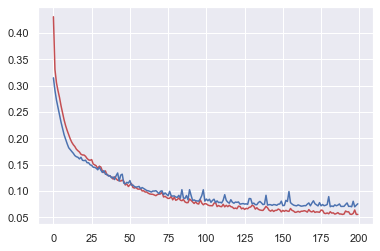

In [80]:
y_loss = history.history['val_loss']
t_loss = history.history['loss']

y_acc = history.history['val_accuracy']

plt.plot(t_loss, c='r')
plt.plot(y_loss, c='b')
plt.show()

# 학습의 자동 중단

In [93]:
df = df_pre
X = df.values[:, :-1]
Y = df.values[:, -1].astype(np.int16)

print(X.dtype)
print(Y.dtype)

float64
int16


In [94]:
model = keras.Sequential()
model.add(keras.layers.Dense(30, input_dim=12, activation='relu'))
model.add(keras.layers.Dense(12, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 30)                390       
                                                                 
 dense_28 (Dense)            (None, 12)                372       
                                                                 
 dense_29 (Dense)            (None, 8)                 104       
                                                                 
 dense_30 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics='accuracy'
)

In [96]:
modelpath = './model/{epoch:02d}-{val_loss:0.4f}.hdf5'
checkerpoint = keras.callbacks.ModelCheckpoint(
    filepath = modelpath,
    monitor = 'val_loss',
    verbose = 1,
    save_best_only = True
)
early_stopping = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 10
)
history = model.fit(X, Y, validation_split=0.3, epochs=1000,
                   batch_size = 500, verbose=1,
                   callbacks=[checkerpoint, early_stopping])

Epoch 1/1000
 1/10 [==>...........................] - ETA: 4s - loss: 4.5579 - accuracy: 0.3880
Epoch 1: val_loss improved from inf to 2.18877, saving model to ./model\01-2.1888.hdf5
10/10 [==============================] - 1s 23ms/step - loss: 3.0014 - accuracy: 0.3517 - val_loss: 2.1888 - val_accuracy: 0.0000e+00
Epoch 2/1000
 1/10 [==>...........................] - ETA: 0s - loss: 1.6661 - accuracy: 0.3620
Epoch 2: val_loss improved from 2.18877 to 0.78578, saving model to ./model\02-0.7858.hdf5
10/10 [==============================] - 0s 7ms/step - loss: 1.2616 - accuracy: 0.3365 - val_loss: 0.7858 - val_accuracy: 0.2344
Epoch 3/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6836 - accuracy: 0.4400
Epoch 3: val_loss improved from 0.78578 to 0.22802, saving model to ./model\03-0.2280.hdf5
10/10 [==============================] - 0s 8ms/step - loss: 0.5025 - accuracy: 0.7526 - val_loss: 0.2280 - val_accuracy: 0.9785
Epoch 4/1000
 1/10 [==>...........................]

 1/10 [==>...........................] - ETA: 0s - loss: 0.2022 - accuracy: 0.9340
Epoch 29: val_loss did not improve from 0.14863
10/10 [==============================] - 0s 6ms/step - loss: 0.1788 - accuracy: 0.9318 - val_loss: 0.1530 - val_accuracy: 0.9641
Epoch 30/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.2088 - accuracy: 0.9140
Epoch 30: val_loss improved from 0.14863 to 0.12578, saving model to ./model\30-0.1258.hdf5
10/10 [==============================] - 0s 8ms/step - loss: 0.1773 - accuracy: 0.9320 - val_loss: 0.1258 - val_accuracy: 0.9733
Epoch 31/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1575 - accuracy: 0.9380
Epoch 31: val_loss did not improve from 0.12578
10/10 [==============================] - 0s 5ms/step - loss: 0.1760 - accuracy: 0.9318 - val_loss: 0.1630 - val_accuracy: 0.9621
Epoch 32/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1475 - accuracy: 0.9420
Epoch 32: val_loss did not improve from 0.12578
10/

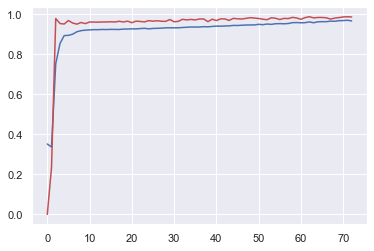

In [98]:
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
t_acc = history.history['accuracy']

plt.plot(t_acc, c='b')
plt.plot(val_acc, c='r')
plt.show()

In [99]:
wine = pd.read_csv('./dataset/wine.csv', header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [100]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [104]:
wine.iloc[:,-2].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [103]:
df = wine

In [105]:
X = df.values[:,:-2]
Y = df.values[:,-1]

print(X.dtype)
print(Y.dtype)

float64
float64


In [116]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y, test_size=0.2, stratify=Y
)

In [128]:
print(X_train.shape, Y_train.shape)

(5197, 11) (5197,)


In [144]:
model = keras.Sequential()
model.add(keras.layers.Dense(22, input_dim=11, activation='relu'))
model.add(keras.layers.Dense(11, activation='relu'))
model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 22)                264       
                                                                 
 dense_52 (Dense)            (None, 11)                253       
                                                                 
 dense_53 (Dense)            (None, 6)                 72        
                                                                 
 dense_54 (Dense)            (None, 1)                 7         
                                                                 
Total params: 596
Trainable params: 596
Non-trainable params: 0
_________________________________________________________________


In [145]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics='accuracy')

In [146]:
modelpath = './model/{epoch:03d}-{val_loss:0.4f}.hdf5'
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath= modelpath,
    monitor= 'val_loss',
    verbose= 1,
    save_best_only = True
)
stoppoint = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=100
)
h = model.fit(X_train,Y_train, validation_split=0.3, epochs=500, batch_size=128,
             callbacks=[checkpoint,
                        stoppoint
                       ], verbose=1)

Epoch 1/500
 1/29 [>.............................] - ETA: 13s - loss: 5.4429 - accuracy: 0.7422
Epoch 1: val_loss improved from inf to 1.66121, saving model to ./model\001-1.6612.hdf5
29/29 [==============================] - 1s 8ms/step - loss: 3.6207 - accuracy: 0.7743 - val_loss: 1.6612 - val_accuracy: 0.8212
Epoch 2/500
 1/29 [>.............................] - ETA: 0s - loss: 1.4412 - accuracy: 0.8359
Epoch 2: val_loss improved from 1.66121 to 0.39054, saving model to ./model\002-0.3905.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.6502 - accuracy: 0.8818 - val_loss: 0.3905 - val_accuracy: 0.8449
Epoch 3/500
 1/29 [>.............................] - ETA: 0s - loss: 0.3158 - accuracy: 0.9297
Epoch 3: val_loss improved from 0.39054 to 0.37403, saving model to ./model\003-0.3740.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.3461 - accuracy: 0.9087 - val_loss: 0.3740 - val_accuracy: 0.9096
Epoch 4/500
 1/29 [>.............................] - ET

29/29 [==============================] - 0s 3ms/step - loss: 0.2667 - accuracy: 0.9271 - val_loss: 0.2872 - val_accuracy: 0.9192
Epoch 28/500
 1/29 [>.............................] - ETA: 0s - loss: 0.2200 - accuracy: 0.9297
Epoch 28: val_loss improved from 0.28721 to 0.28539, saving model to ./model\028-0.2854.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.2645 - accuracy: 0.9277 - val_loss: 0.2854 - val_accuracy: 0.9192
Epoch 29/500
 1/29 [>.............................] - ETA: 0s - loss: 0.2510 - accuracy: 0.9375
Epoch 29: val_loss improved from 0.28539 to 0.28257, saving model to ./model\029-0.2826.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.2631 - accuracy: 0.9282 - val_loss: 0.2826 - val_accuracy: 0.9212
Epoch 30/500
 1/29 [>.............................] - ETA: 0s - loss: 0.2960 - accuracy: 0.8906
Epoch 30: val_loss improved from 0.28257 to 0.28222, saving model to ./model\030-0.2822.hdf5
29/29 [==============================] - 0s 4m

Epoch 54/500
 1/29 [>.............................] - ETA: 0s - loss: 0.1006 - accuracy: 0.9531
Epoch 54: val_loss improved from 0.14820 to 0.14634, saving model to ./model\054-0.1463.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 0.1290 - accuracy: 0.9541 - val_loss: 0.1463 - val_accuracy: 0.9417
Epoch 55/500
 1/29 [>.............................] - ETA: 0s - loss: 0.1443 - accuracy: 0.9453
Epoch 55: val_loss improved from 0.14634 to 0.14157, saving model to ./model\055-0.1416.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.1257 - accuracy: 0.9574 - val_loss: 0.1416 - val_accuracy: 0.9455
Epoch 56/500
 1/29 [>.............................] - ETA: 0s - loss: 0.1050 - accuracy: 0.9688
Epoch 56: val_loss improved from 0.14157 to 0.13808, saving model to ./model\056-0.1381.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.1215 - accuracy: 0.9549 - val_loss: 0.1381 - val_accuracy: 0.9442
Epoch 57/500
 1/29 [>.........................

 1/29 [>.............................] - ETA: 0s - loss: 0.0617 - accuracy: 0.9766
Epoch 81: val_loss improved from 0.10332 to 0.10040, saving model to ./model\081-0.1004.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.0888 - accuracy: 0.9725 - val_loss: 0.1004 - val_accuracy: 0.9647
Epoch 82/500
 1/29 [>.............................] - ETA: 0s - loss: 0.1562 - accuracy: 0.9688
Epoch 82: val_loss improved from 0.10040 to 0.09743, saving model to ./model\082-0.0974.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.0876 - accuracy: 0.9717 - val_loss: 0.0974 - val_accuracy: 0.9705
Epoch 83/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0808 - accuracy: 0.9766
Epoch 83: val_loss did not improve from 0.09743
29/29 [==============================] - 0s 3ms/step - loss: 0.0901 - accuracy: 0.9714 - val_loss: 0.1085 - val_accuracy: 0.9571
Epoch 84/500
 1/29 [>.............................] - ETA: 0s - loss: 0.1249 - accuracy: 0.9609
Epoch 84

Epoch 109/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0308 - accuracy: 0.9844
Epoch 109: val_loss did not improve from 0.07893
29/29 [==============================] - 0s 2ms/step - loss: 0.0765 - accuracy: 0.9758 - val_loss: 0.0815 - val_accuracy: 0.9679
Epoch 110/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0200 - accuracy: 1.0000
Epoch 110: val_loss did not improve from 0.07893
29/29 [==============================] - 0s 3ms/step - loss: 0.0710 - accuracy: 0.9794 - val_loss: 0.0816 - val_accuracy: 0.9724
Epoch 111/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0784 - accuracy: 0.9609
Epoch 111: val_loss improved from 0.07893 to 0.07630, saving model to ./model\111-0.0763.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 0.0719 - accuracy: 0.9797 - val_loss: 0.0763 - val_accuracy: 0.9763
Epoch 112/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0398 - accuracy: 0.9844
Epoch 112: val_loss did not impro

Epoch 137/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0335 - accuracy: 0.9844
Epoch 137: val_loss did not improve from 0.06806
29/29 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9813 - val_loss: 0.0721 - val_accuracy: 0.9763
Epoch 138/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0828 - accuracy: 0.9766
Epoch 138: val_loss did not improve from 0.06806
29/29 [==============================] - 0s 3ms/step - loss: 0.0659 - accuracy: 0.9810 - val_loss: 0.0834 - val_accuracy: 0.9705
Epoch 139/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0979 - accuracy: 0.9844
Epoch 139: val_loss improved from 0.06806 to 0.06696, saving model to ./model\139-0.0670.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.0658 - accuracy: 0.9816 - val_loss: 0.0670 - val_accuracy: 0.9788
Epoch 140/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0353 - accuracy: 0.9922
Epoch 140: val_loss did not impro

29/29 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.9821 - val_loss: 0.0625 - val_accuracy: 0.9821
Epoch 166/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0866 - accuracy: 0.9844
Epoch 166: val_loss improved from 0.06254 to 0.06197, saving model to ./model\166-0.0620.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9827 - val_loss: 0.0620 - val_accuracy: 0.9808
Epoch 167/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0293 - accuracy: 0.9844
Epoch 167: val_loss did not improve from 0.06197
29/29 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9857 - val_loss: 0.0646 - val_accuracy: 0.9801
Epoch 168/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0212 - accuracy: 1.0000
Epoch 168: val_loss did not improve from 0.06197
29/29 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9843 - val_loss: 0.0739 - val_accuracy: 0.9744
E

29/29 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.9830 - val_loss: 0.0642 - val_accuracy: 0.9769
Epoch 224/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0075 - accuracy: 1.0000
Epoch 224: val_loss improved from 0.05885 to 0.05845, saving model to ./model\224-0.0585.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 0.0578 - accuracy: 0.9835 - val_loss: 0.0585 - val_accuracy: 0.9833
Epoch 225/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0614 - accuracy: 0.9766
Epoch 225: val_loss did not improve from 0.05845
29/29 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9835 - val_loss: 0.0715 - val_accuracy: 0.9756
Epoch 226/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0695 - accuracy: 0.9688
Epoch 226: val_loss did not improve from 0.05845
29/29 [==============================] - 0s 2ms/step - loss: 0.0587 - accuracy: 0.9852 - val_loss: 0.0810 - val_accuracy: 0.9731
E

Epoch 253/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0268 - accuracy: 0.9844
Epoch 253: val_loss did not improve from 0.05726
29/29 [==============================] - 0s 3ms/step - loss: 0.0604 - accuracy: 0.9835 - val_loss: 0.0598 - val_accuracy: 0.9795
Epoch 254/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0216 - accuracy: 0.9922
Epoch 254: val_loss did not improve from 0.05726
29/29 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9849 - val_loss: 0.0576 - val_accuracy: 0.9827
Epoch 255/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0301 - accuracy: 1.0000
Epoch 255: val_loss did not improve from 0.05726
29/29 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9863 - val_loss: 0.0617 - val_accuracy: 0.9782
Epoch 256/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0201 - accuracy: 0.9922
Epoch 256: val_loss did not improve from 0.05726
29/29 [======================

Epoch 283/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0624 - accuracy: 0.9844
Epoch 283: val_loss did not improve from 0.05662
29/29 [==============================] - 0s 3ms/step - loss: 0.0543 - accuracy: 0.9849 - val_loss: 0.0673 - val_accuracy: 0.9788
Epoch 284/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0468 - accuracy: 0.9766
Epoch 284: val_loss did not improve from 0.05662
29/29 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9843 - val_loss: 0.0616 - val_accuracy: 0.9776
Epoch 285/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0863 - accuracy: 0.9688
Epoch 285: val_loss did not improve from 0.05662
29/29 [==============================] - 0s 2ms/step - loss: 0.0598 - accuracy: 0.9830 - val_loss: 0.0912 - val_accuracy: 0.9718
Epoch 286/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0694 - accuracy: 0.9844
Epoch 286: val_loss did not improve from 0.05662
29/29 [======================

29/29 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.9849 - val_loss: 0.0577 - val_accuracy: 0.9833
Epoch 313/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0371 - accuracy: 0.9922
Epoch 313: val_loss did not improve from 0.05561
29/29 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9857 - val_loss: 0.0569 - val_accuracy: 0.9833
Epoch 314/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0252 - accuracy: 0.9922
Epoch 314: val_loss did not improve from 0.05561
29/29 [==============================] - 0s 3ms/step - loss: 0.0540 - accuracy: 0.9849 - val_loss: 0.0580 - val_accuracy: 0.9833
Epoch 315/500
 1/29 [>.............................] - ETA: 0s - loss: 0.1030 - accuracy: 0.9688
Epoch 315: val_loss did not improve from 0.05561
29/29 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9868 - val_loss: 0.0598 - val_accuracy: 0.9801
Epoch 316/500
 1/29 [>........................

Epoch 372/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0142 - accuracy: 1.0000
Epoch 372: val_loss did not improve from 0.05518
29/29 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9854 - val_loss: 0.0592 - val_accuracy: 0.9827
Epoch 373/500
 1/29 [>.............................] - ETA: 0s - loss: 0.1298 - accuracy: 0.9531
Epoch 373: val_loss did not improve from 0.05518
29/29 [==============================] - 0s 2ms/step - loss: 0.0678 - accuracy: 0.9772 - val_loss: 0.0611 - val_accuracy: 0.9827
Epoch 374/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0306 - accuracy: 0.9844
Epoch 374: val_loss did not improve from 0.05518
29/29 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 0.9857 - val_loss: 0.0585 - val_accuracy: 0.9833
Epoch 375/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0237 - accuracy: 0.9844
Epoch 375: val_loss did not improve from 0.05518
29/29 [======================

Epoch 402/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0187 - accuracy: 1.0000
Epoch 402: val_loss did not improve from 0.05504
29/29 [==============================] - 0s 2ms/step - loss: 0.0522 - accuracy: 0.9852 - val_loss: 0.0625 - val_accuracy: 0.9776
Epoch 403/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0560 - accuracy: 0.9844
Epoch 403: val_loss did not improve from 0.05504
29/29 [==============================] - 0s 2ms/step - loss: 0.0499 - accuracy: 0.9863 - val_loss: 0.0574 - val_accuracy: 0.9821
Epoch 404/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0331 - accuracy: 0.9844
Epoch 404: val_loss did not improve from 0.05504
29/29 [==============================] - 0s 2ms/step - loss: 0.0519 - accuracy: 0.9849 - val_loss: 0.0564 - val_accuracy: 0.9814
Epoch 405/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0602 - accuracy: 0.9922
Epoch 405: val_loss did not improve from 0.05504
29/29 [======================

Epoch 432/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0927 - accuracy: 0.9844
Epoch 432: val_loss did not improve from 0.05504
29/29 [==============================] - 0s 2ms/step - loss: 0.0599 - accuracy: 0.9827 - val_loss: 0.0592 - val_accuracy: 0.9808
Epoch 433/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0748 - accuracy: 0.9766
Epoch 433: val_loss did not improve from 0.05504
29/29 [==============================] - 0s 2ms/step - loss: 0.0507 - accuracy: 0.9860 - val_loss: 0.0605 - val_accuracy: 0.9795
Epoch 434/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0259 - accuracy: 0.9922
Epoch 434: val_loss did not improve from 0.05504
29/29 [==============================] - 0s 2ms/step - loss: 0.0502 - accuracy: 0.9868 - val_loss: 0.0609 - val_accuracy: 0.9833
Epoch 435/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0577 - accuracy: 0.9766
Epoch 435: val_loss did not improve from 0.05504
29/29 [======================

Epoch 462/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0147 - accuracy: 1.0000
Epoch 462: val_loss did not improve from 0.05504
29/29 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9860 - val_loss: 0.0578 - val_accuracy: 0.9827
Epoch 463/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0111 - accuracy: 1.0000
Epoch 463: val_loss did not improve from 0.05504
29/29 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9854 - val_loss: 0.0556 - val_accuracy: 0.9833
Epoch 464/500
 1/29 [>.............................] - ETA: 0s - loss: 0.1103 - accuracy: 0.9844
Epoch 464: val_loss did not improve from 0.05504
29/29 [==============================] - 0s 2ms/step - loss: 0.0479 - accuracy: 0.9868 - val_loss: 0.0568 - val_accuracy: 0.9840
Epoch 465/500
 1/29 [>.............................] - ETA: 0s - loss: 0.0746 - accuracy: 0.9844
Epoch 465: val_loss did not improve from 0.05504
29/29 [======================

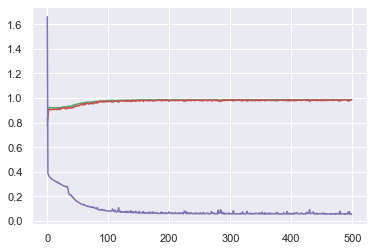

In [147]:
train_acc = h.history['accuracy']
val_acc = h.history['val_accuracy']
val_loss = h.history['val_loss']

plt.plot(train_acc, c='g')
plt.plot(val_acc, c='r')

plt.plot(val_loss, c='m')

plt.show()

In [150]:
val_loss

[1.6612114906311035,
 0.39053505659103394,
 0.3740330636501312,
 0.3631569445133209,
 0.35762983560562134,
 0.351693719625473,
 0.34713014960289,
 0.3427494168281555,
 0.33847346901893616,
 0.33482325077056885,
 0.33300238847732544,
 0.3291760981082916,
 0.32580292224884033,
 0.32274407148361206,
 0.31895387172698975,
 0.31921419501304626,
 0.3142956495285034,
 0.31558117270469666,
 0.30716463923454285,
 0.3078397810459137,
 0.3031650483608246,
 0.3043021857738495,
 0.298392653465271,
 0.2942003011703491,
 0.2927037477493286,
 0.2896539866924286,
 0.2872120440006256,
 0.28539353609085083,
 0.2825717329978943,
 0.28221869468688965,
 0.2787197232246399,
 0.27717822790145874,
 0.2821062207221985,
 0.27391043305397034,
 0.26243406534194946,
 0.22422178089618683,
 0.21875274181365967,
 0.21231597661972046,
 0.20879866182804108,
 0.21084721386432648,
 0.20049184560775757,
 0.19718894362449646,
 0.18914377689361572,
 0.19003413617610931,
 0.17754238843917847,
 0.1733425259590149,
 0.170678675

In [148]:
evalue = model.evaluate(X_test,Y_test)

41/41 [==============================] - 0s 991us/step - loss: 0.0486 - accuracy: 0.9885


In [149]:
evalue

[0.04857926815748215, 0.9884615540504456]

In [142]:
best_model = keras.models.load_model('./model/156-0.0699.hdf5')

In [143]:
best_model.evaluate(X_test,Y_test)

41/41 [==============================] - 0s 1ms/step - loss: 0.0551 - accuracy: 0.9877


[0.05511465668678284, 0.9876922965049744]

# 선형 회귀 적용

In [151]:
import tensorflow
from tensorflow import keras

import pandas as pd
import numpy as np

In [152]:
np.random.seed(0)
tf.random.set_seed(3)

In [160]:
housing = pd.read_csv('./dataset/housing.csv',
                      delim_whitespace=True, header=None)
housing.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [164]:
X = housing.values[:, :-1]
Y = housing.values[:, -1]

print(X.dtype, X.shape)
print(Y.dtype)

float64 (506, 13)
float64


In [166]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y, test_size=0.3, random_state = 0
)
print(X_train.shape, X_test.shape)

(354, 13) (152, 13)


In [177]:
model = keras.Sequential()
model.add(keras.layers.Dense(30, input_dim=13, activation='relu'))
model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(1, activation='linear'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 30)                420       
                                                                 
 dense_59 (Dense)            (None, 6)                 186       
                                                                 
 dense_60 (Dense)            (None, 1)                 7         
                                                                 
Total params: 613
Trainable params: 613
Non-trainable params: 0
_________________________________________________________________


In [178]:
model.compile(loss = 'mean_squared_error',
             optimizer = 'adam',
             metrics = 'mse')

In [179]:
hist = model.fit(X_train,Y_train, epochs=500, batch_size=10,
                validation_split=0.3)

Epoch 1/500
25/25 [==============================] - 1s 7ms/step - loss: 1772.6315 - mse: 1772.6315 - val_loss: 764.3580 - val_mse: 764.3580
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 353.4928 - mse: 353.4928 - val_loss: 312.0444 - val_mse: 312.0444
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 201.9167 - mse: 201.9167 - val_loss: 243.7802 - val_mse: 243.7802
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 169.8891 - mse: 169.8891 - val_loss: 204.7889 - val_mse: 204.7889
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 139.2686 - mse: 139.2686 - val_loss: 169.6837 - val_mse: 169.6837
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 120.0163 - mse: 120.0163 - val_loss: 146.4912 - val_mse: 146.4912
Epoch 7/500
25/25 [==============================] - 0s 3ms/step - loss: 110.6240 - mse: 110.6240 - val_loss: 145.9120 - val_mse: 145.9120
Epoch 8/500
25/25 [======

25/25 [==============================] - 0s 2ms/step - loss: 32.0971 - mse: 32.0971 - val_loss: 43.4849 - val_mse: 43.4849
Epoch 62/500
25/25 [==============================] - 0s 2ms/step - loss: 33.5304 - mse: 33.5304 - val_loss: 47.5296 - val_mse: 47.5296
Epoch 63/500
25/25 [==============================] - 0s 2ms/step - loss: 41.7898 - mse: 41.7898 - val_loss: 57.1078 - val_mse: 57.1078
Epoch 64/500
25/25 [==============================] - 0s 2ms/step - loss: 37.7710 - mse: 37.7710 - val_loss: 42.4691 - val_mse: 42.4691
Epoch 65/500
25/25 [==============================] - 0s 3ms/step - loss: 33.2454 - mse: 33.2454 - val_loss: 41.7663 - val_mse: 41.7663
Epoch 66/500
25/25 [==============================] - 0s 2ms/step - loss: 31.6079 - mse: 31.6079 - val_loss: 41.6598 - val_mse: 41.6598
Epoch 67/500
25/25 [==============================] - 0s 2ms/step - loss: 33.1858 - mse: 33.1858 - val_loss: 46.1765 - val_mse: 46.1765
Epoch 68/500
25/25 [==============================] - 0s 2ms/

Epoch 181/500
25/25 [==============================] - 0s 2ms/step - loss: 24.0826 - mse: 24.0826 - val_loss: 34.6932 - val_mse: 34.6932
Epoch 182/500
25/25 [==============================] - 0s 3ms/step - loss: 25.9317 - mse: 25.9317 - val_loss: 36.3344 - val_mse: 36.3344
Epoch 183/500
25/25 [==============================] - 0s 2ms/step - loss: 27.2814 - mse: 27.2814 - val_loss: 35.5383 - val_mse: 35.5383
Epoch 184/500
25/25 [==============================] - 0s 2ms/step - loss: 26.3995 - mse: 26.3995 - val_loss: 34.6837 - val_mse: 34.6836
Epoch 185/500
25/25 [==============================] - 0s 2ms/step - loss: 26.4145 - mse: 26.4145 - val_loss: 36.2642 - val_mse: 36.2642
Epoch 186/500
25/25 [==============================] - 0s 2ms/step - loss: 25.3535 - mse: 25.3535 - val_loss: 33.7229 - val_mse: 33.7229
Epoch 187/500
25/25 [==============================] - 0s 2ms/step - loss: 23.0237 - mse: 23.0237 - val_loss: 39.1637 - val_mse: 39.1637
Epoch 188/500
25/25 [====================

Epoch 241/500
25/25 [==============================] - 0s 2ms/step - loss: 20.3973 - mse: 20.3973 - val_loss: 30.0252 - val_mse: 30.0252
Epoch 242/500
25/25 [==============================] - 0s 2ms/step - loss: 22.4430 - mse: 22.4430 - val_loss: 29.2215 - val_mse: 29.2215
Epoch 243/500
25/25 [==============================] - 0s 2ms/step - loss: 24.9501 - mse: 24.9501 - val_loss: 29.8567 - val_mse: 29.8567
Epoch 244/500
25/25 [==============================] - 0s 2ms/step - loss: 22.6542 - mse: 22.6542 - val_loss: 31.8373 - val_mse: 31.8373
Epoch 245/500
25/25 [==============================] - 0s 2ms/step - loss: 22.7648 - mse: 22.7648 - val_loss: 39.3395 - val_mse: 39.3395
Epoch 246/500
25/25 [==============================] - 0s 2ms/step - loss: 24.9312 - mse: 24.9312 - val_loss: 29.1799 - val_mse: 29.1799
Epoch 247/500
25/25 [==============================] - 0s 2ms/step - loss: 24.8090 - mse: 24.8090 - val_loss: 28.7453 - val_mse: 28.7453
Epoch 248/500
25/25 [====================

Epoch 301/500
25/25 [==============================] - 0s 2ms/step - loss: 20.3727 - mse: 20.3727 - val_loss: 26.4370 - val_mse: 26.4370
Epoch 302/500
25/25 [==============================] - 0s 2ms/step - loss: 19.9104 - mse: 19.9104 - val_loss: 26.1831 - val_mse: 26.1831
Epoch 303/500
25/25 [==============================] - 0s 2ms/step - loss: 21.6569 - mse: 21.6569 - val_loss: 29.4265 - val_mse: 29.4265
Epoch 304/500
25/25 [==============================] - 0s 2ms/step - loss: 22.1261 - mse: 22.1261 - val_loss: 36.9626 - val_mse: 36.9626
Epoch 305/500
25/25 [==============================] - 0s 2ms/step - loss: 18.6416 - mse: 18.6416 - val_loss: 27.9454 - val_mse: 27.9454
Epoch 306/500
25/25 [==============================] - 0s 2ms/step - loss: 20.8456 - mse: 20.8456 - val_loss: 27.9565 - val_mse: 27.9565
Epoch 307/500
25/25 [==============================] - 0s 2ms/step - loss: 19.4990 - mse: 19.4990 - val_loss: 26.5468 - val_mse: 26.5468
Epoch 308/500
25/25 [====================

Epoch 361/500
25/25 [==============================] - 0s 2ms/step - loss: 18.4839 - mse: 18.4839 - val_loss: 27.4375 - val_mse: 27.4375
Epoch 362/500
25/25 [==============================] - 0s 3ms/step - loss: 20.2550 - mse: 20.2550 - val_loss: 27.5069 - val_mse: 27.5069
Epoch 363/500
25/25 [==============================] - 0s 2ms/step - loss: 20.1253 - mse: 20.1253 - val_loss: 26.2979 - val_mse: 26.2979
Epoch 364/500
25/25 [==============================] - 0s 2ms/step - loss: 17.9381 - mse: 17.9381 - val_loss: 27.6079 - val_mse: 27.6079
Epoch 365/500
25/25 [==============================] - 0s 2ms/step - loss: 20.9019 - mse: 20.9019 - val_loss: 36.1547 - val_mse: 36.1547
Epoch 366/500
25/25 [==============================] - 0s 2ms/step - loss: 18.2930 - mse: 18.2930 - val_loss: 24.6386 - val_mse: 24.6386
Epoch 367/500
25/25 [==============================] - 0s 2ms/step - loss: 18.9912 - mse: 18.9912 - val_loss: 45.2561 - val_mse: 45.2561
Epoch 368/500
25/25 [====================

Epoch 421/500
25/25 [==============================] - 0s 2ms/step - loss: 17.5018 - mse: 17.5017 - val_loss: 26.1311 - val_mse: 26.1311
Epoch 422/500
25/25 [==============================] - 0s 2ms/step - loss: 16.9967 - mse: 16.9967 - val_loss: 23.9652 - val_mse: 23.9652
Epoch 423/500
25/25 [==============================] - 0s 2ms/step - loss: 18.4877 - mse: 18.4877 - val_loss: 24.6003 - val_mse: 24.6003
Epoch 424/500
25/25 [==============================] - 0s 2ms/step - loss: 20.1462 - mse: 20.1462 - val_loss: 36.2556 - val_mse: 36.2556
Epoch 425/500
25/25 [==============================] - 0s 2ms/step - loss: 24.6512 - mse: 24.6512 - val_loss: 27.4326 - val_mse: 27.4326
Epoch 426/500
25/25 [==============================] - 0s 2ms/step - loss: 19.2443 - mse: 19.2443 - val_loss: 26.8144 - val_mse: 26.8144
Epoch 427/500
25/25 [==============================] - 0s 2ms/step - loss: 21.0127 - mse: 21.0127 - val_loss: 28.8280 - val_mse: 28.8280
Epoch 428/500
25/25 [====================

Epoch 481/500
25/25 [==============================] - 0s 2ms/step - loss: 16.0084 - mse: 16.0084 - val_loss: 23.5590 - val_mse: 23.5590
Epoch 482/500
25/25 [==============================] - 0s 2ms/step - loss: 15.0030 - mse: 15.0030 - val_loss: 36.0947 - val_mse: 36.0947
Epoch 483/500
25/25 [==============================] - 0s 2ms/step - loss: 23.1844 - mse: 23.1844 - val_loss: 23.0132 - val_mse: 23.0132
Epoch 484/500
25/25 [==============================] - 0s 2ms/step - loss: 15.5509 - mse: 15.5509 - val_loss: 22.4355 - val_mse: 22.4355
Epoch 485/500
25/25 [==============================] - 0s 2ms/step - loss: 15.7796 - mse: 15.7796 - val_loss: 24.2815 - val_mse: 24.2815
Epoch 486/500
25/25 [==============================] - 0s 2ms/step - loss: 18.1961 - mse: 18.1961 - val_loss: 29.7590 - val_mse: 29.7590
Epoch 487/500
25/25 [==============================] - 0s 2ms/step - loss: 24.0793 - mse: 24.0793 - val_loss: 30.2863 - val_mse: 30.2863
Epoch 488/500
25/25 [====================

In [180]:
hist.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

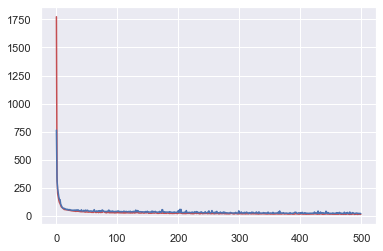

In [181]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], c='r')
plt.plot(hist.history['val_loss'], c='b')
plt.show()

# 이미지 분류

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [183]:
from tensorflow import keras

In [187]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [191]:
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


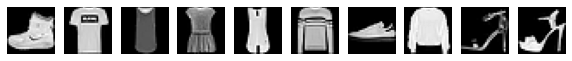

In [193]:
fig, axes = plt.subplots(1,10,figsize=(10,10))

for i in range(10):
    axes[i].imshow(train_input[i], cmap='gray')
    axes[i].axis('off')
plt.show()

In [195]:
train_target[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [197]:
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [198]:
train_scaled = (train_input/255.0).reshape(-1, 28*28)
test_scaled = (test_input/255.0).reshape(-1, 28*28)

train_scaled.shape

(60000, 784)

In [199]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2
)

In [202]:
print(train_scaled.shape, val_scaled.shape)

(48000, 784) (12000, 784)


In [206]:
model = keras.Sequential()
model.add(keras.layers.Dense(30, input_shape = (784,), activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 30)                23550     
                                                                 
 dense_64 (Dense)            (None, 10)                310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [207]:
model.compile(loss='sparse_categorical_crossentropy',
             metrics = 'accuracy',
             optimizer = 'adam')

In [209]:
hist = model.fit(train_scaled,train_target, epochs=100, batch_size=200,
                validation_data=(val_scaled,val_target))

Epoch 1/100
240/240 [==============================] - 1s 3ms/step - loss: 0.7652 - accuracy: 0.7495 - val_loss: 0.5275 - val_accuracy: 0.8202
Epoch 2/100
240/240 [==============================] - 1s 2ms/step - loss: 0.4836 - accuracy: 0.8357 - val_loss: 0.4612 - val_accuracy: 0.8396
Epoch 3/100
240/240 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.8491 - val_loss: 0.4312 - val_accuracy: 0.8505
Epoch 4/100
240/240 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8560 - val_loss: 0.4268 - val_accuracy: 0.8518
Epoch 5/100
240/240 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8622 - val_loss: 0.4169 - val_accuracy: 0.8548
Epoch 6/100
240/240 [==============================] - 0s 2ms/step - loss: 0.3872 - accuracy: 0.8654 - val_loss: 0.3928 - val_accuracy: 0.8648
Epoch 7/100
240/240 [==============================] - 0s 2ms/step - loss: 0.3753 - accuracy: 0.8700 - val_loss: 0.3826 - val_accuracy: 0.8697

Epoch 58/100
240/240 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.9166 - val_loss: 0.3644 - val_accuracy: 0.8797
Epoch 59/100
240/240 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.9179 - val_loss: 0.3605 - val_accuracy: 0.8808
Epoch 60/100
240/240 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.9170 - val_loss: 0.3611 - val_accuracy: 0.8788
Epoch 61/100
240/240 [==============================] - 0s 2ms/step - loss: 0.2304 - accuracy: 0.9182 - val_loss: 0.3605 - val_accuracy: 0.8788
Epoch 62/100
240/240 [==============================] - 0s 2ms/step - loss: 0.2263 - accuracy: 0.9191 - val_loss: 0.3651 - val_accuracy: 0.8776
Epoch 63/100
240/240 [==============================] - 0s 2ms/step - loss: 0.2274 - accuracy: 0.9193 - val_loss: 0.3722 - val_accuracy: 0.8759
Epoch 64/100
240/240 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.9201 - val_loss: 0.3659 - val_accuracy:

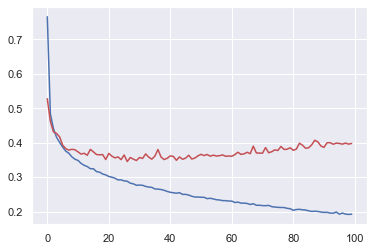

In [212]:
plt.plot(hist.history['loss'], c='b')
plt.plot(hist.history['val_loss'], c='r')
plt.show()

In [213]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, input_shape = (784,),
                             activation='relu', name='hidden1'))
model.add(keras.layers.Dense(30, activation='relu', name='hidden2'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 30)                3030      
                                                                 
 dense_65 (Dense)            (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [214]:
model.compile(loss='sparse_categorical_crossentropy',
             metrics = 'accuracy',
             optimizer = 'adam')

In [215]:
hist = model.fit(train_scaled,train_target, epochs=100, batch_size=200,
                validation_data=(val_scaled,val_target))

Epoch 1/100
240/240 [==============================] - 1s 3ms/step - loss: 0.6603 - accuracy: 0.7748 - val_loss: 0.4601 - val_accuracy: 0.8403
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 0.4280 - accuracy: 0.8510 - val_loss: 0.4065 - val_accuracy: 0.8587
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3890 - accuracy: 0.8628 - val_loss: 0.3831 - val_accuracy: 0.8662
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3627 - accuracy: 0.8708 - val_loss: 0.4170 - val_accuracy: 0.8528
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3397 - accuracy: 0.8777 - val_loss: 0.3978 - val_accuracy: 0.8556
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3243 - accuracy: 0.8844 - val_loss: 0.3582 - val_accuracy: 0.8729
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3137 - accuracy: 0.8852 - val_loss: 0.3300 - val_accuracy: 0.8837

Epoch 58/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1064 - accuracy: 0.9619 - val_loss: 0.4329 - val_accuracy: 0.8874
Epoch 59/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1081 - accuracy: 0.9607 - val_loss: 0.4293 - val_accuracy: 0.8913
Epoch 60/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1055 - accuracy: 0.9617 - val_loss: 0.4426 - val_accuracy: 0.8887
Epoch 61/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1022 - accuracy: 0.9627 - val_loss: 0.4628 - val_accuracy: 0.8836
Epoch 62/100
240/240 [==============================] - 1s 3ms/step - loss: 0.1040 - accuracy: 0.9624 - val_loss: 0.4541 - val_accuracy: 0.8867
Epoch 63/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0965 - accuracy: 0.9651 - val_loss: 0.4599 - val_accuracy: 0.8892
Epoch 64/100
240/240 [==============================] - 1s 3ms/step - loss: 0.0949 - accuracy: 0.9653 - val_loss: 0.4514 - val_accuracy:

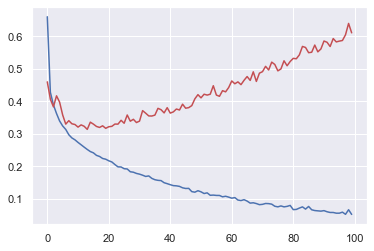

In [216]:
plt.plot(hist.history['loss'], c='b')
plt.plot(hist.history['val_loss'], c='r')
plt.show()

In [217]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.6443 - accuracy: 0.8827


[0.6443493366241455, 0.8827000260353088]

In [225]:
## model 함수 정의
def model_fn(a_layer=None, name=None):
    model = keras.Sequential(name=name)
    model.add(keras.layers.Dense(100, input_shape=(784,), activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    return model

# overfitting

In [230]:
model = model_fn()

# model.summary()

model.compile(loss='sparse_categorical_crossentropy',
#              optimizer='adam',
             metrics='accuracy')
hist = model.fit(train_scaled, train_target, epochs=40,
                validation_data=(val_scaled, val_target))

In [232]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.6846 - accuracy: 0.8699


[0.6845600008964539, 0.8698999881744385]

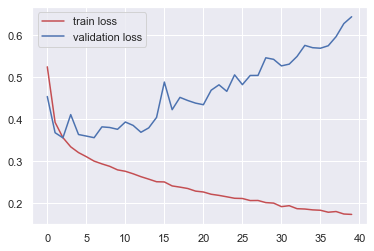

In [234]:
plt.plot(hist.history['loss'], c='r', label='train loss')
plt.plot(hist.history['val_loss'], c='b', label='validation loss')
plt.legend()

plt.show()

In [235]:
model = model_fn()

# model.summary()

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics='accuracy')
hist = model.fit(train_scaled, train_target, epochs=40,
                validation_data=(val_scaled, val_target))

Epoch 1/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5196 - accuracy: 0.8190 - val_loss: 0.4131 - val_accuracy: 0.8522
Epoch 2/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3994 - accuracy: 0.8579 - val_loss: 0.3646 - val_accuracy: 0.8713
Epoch 3/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3592 - accuracy: 0.8715 - val_loss: 0.3473 - val_accuracy: 0.8750
Epoch 4/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3306 - accuracy: 0.8801 - val_loss: 0.3636 - val_accuracy: 0.8662
Epoch 5/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3081 - accuracy: 0.8857 - val_loss: 0.3471 - val_accuracy: 0.8752
Epoch 6/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2947 - accuracy: 0.8912 - val_loss: 0.3207 - val_accuracy: 0.8851
Epoch 7/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2823 - accuracy: 0.8950 - val_loss: 0.3375 - val_accuracy:

In [236]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.4458 - accuracy: 0.8794


[0.44575926661491394, 0.8794000148773193]

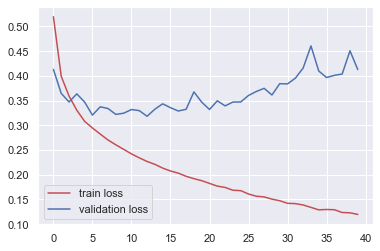

In [237]:
plt.plot(hist.history['loss'], c='r', label='train loss')
plt.plot(hist.history['val_loss'], c='b', label='validation loss')
plt.legend()

plt.show()

## dropout으로 overfitting 규제하기

In [241]:
model = model_fn(keras.layers.Dropout(0.3), name='Dropout_layers')

model.summary()

Model: "Dropout_layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_83 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [242]:
model = model_fn()

# model.summary()

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics='accuracy')
hist = model.fit(train_scaled, train_target, epochs=40,
                validation_data=(val_scaled, val_target))

Epoch 1/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5254 - accuracy: 0.8160 - val_loss: 0.4165 - val_accuracy: 0.8534
Epoch 2/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3986 - accuracy: 0.8580 - val_loss: 0.3750 - val_accuracy: 0.8667
Epoch 3/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3589 - accuracy: 0.8696 - val_loss: 0.3485 - val_accuracy: 0.8758
Epoch 4/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3319 - accuracy: 0.8790 - val_loss: 0.3633 - val_accuracy: 0.8680
Epoch 5/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3105 - accuracy: 0.8861 - val_loss: 0.3429 - val_accuracy: 0.8791
Epoch 6/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2978 - accuracy: 0.8906 - val_loss: 0.3311 - val_accuracy: 0.8795
Epoch 7/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2842 - accuracy: 0.8950 - val_loss: 0.3248 - val_accuracy:

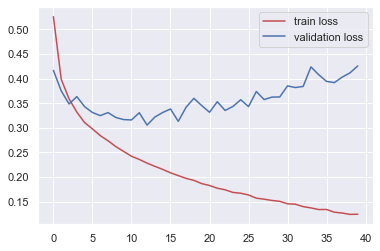

In [243]:
plt.plot(hist.history['loss'], c='r', label='train loss')
plt.plot(hist.history['val_loss'], c='b', label='validation loss')
plt.legend()

plt.show()